# k cluster
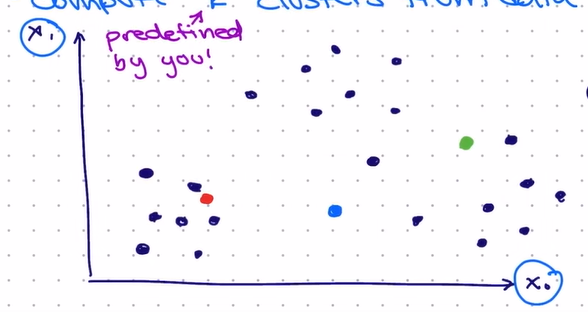

steps:-
1. choose 3 random points to be centroids
2. calculate distance b/w points and centroids designing plots to the closest.
3. compute new centroids.

till we reach something like this:-
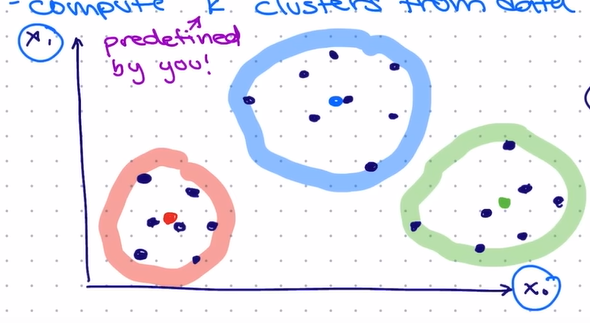

# PrincipalComponent Analysis
-> dimensionalit redution
-> component (dimention in space) with longest variance

For the graph:-
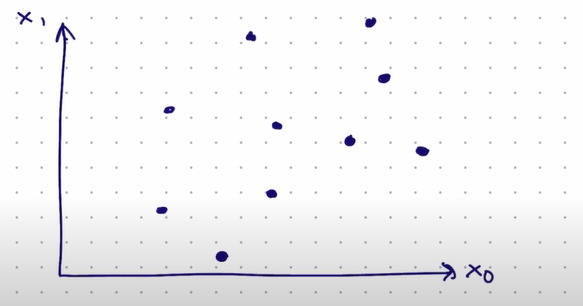



In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cols =["area", "perimeter", "compactness", "length", "width", "asymmetry", "grove", "class"]
df = pd.read_csv('seeds_dataset.txt', names = cols, sep="\s+")

In [4]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,grove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


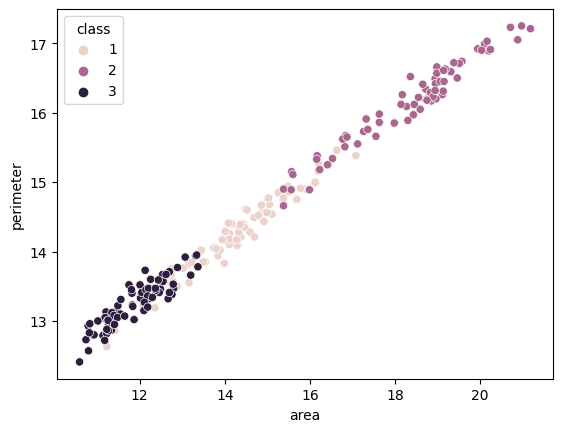

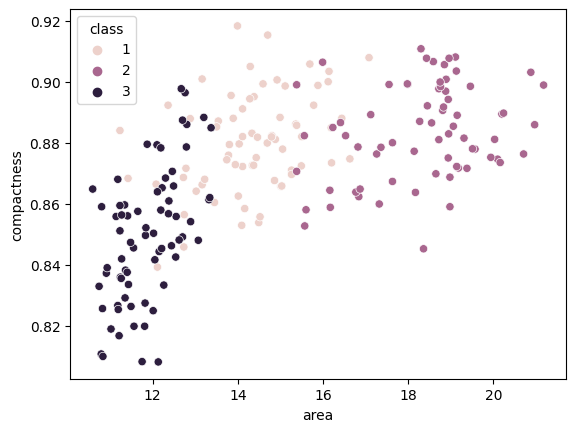

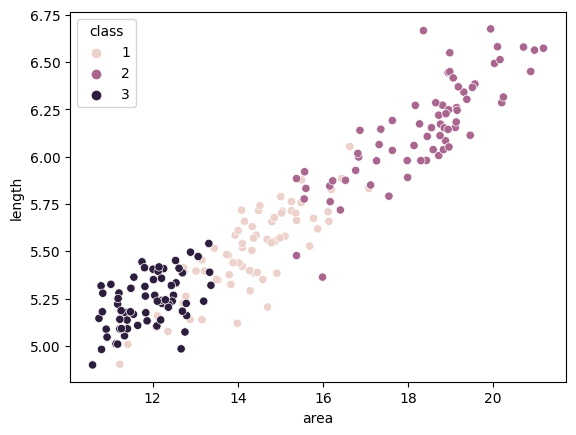

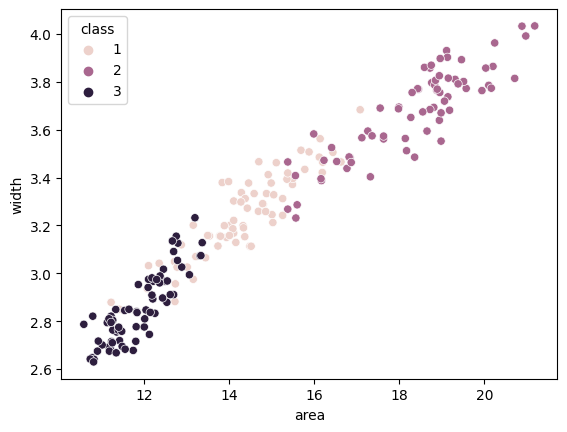

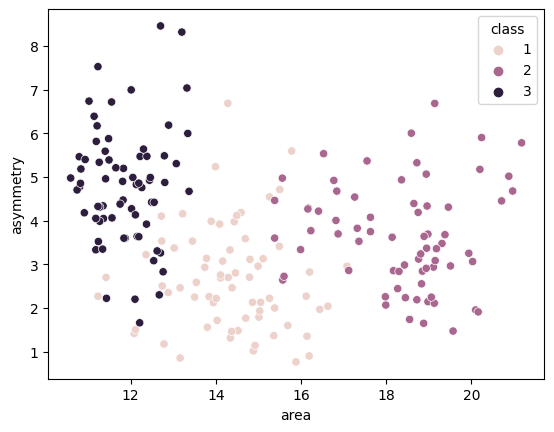

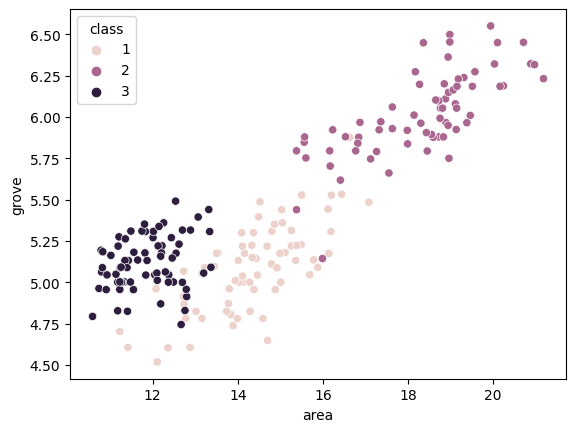

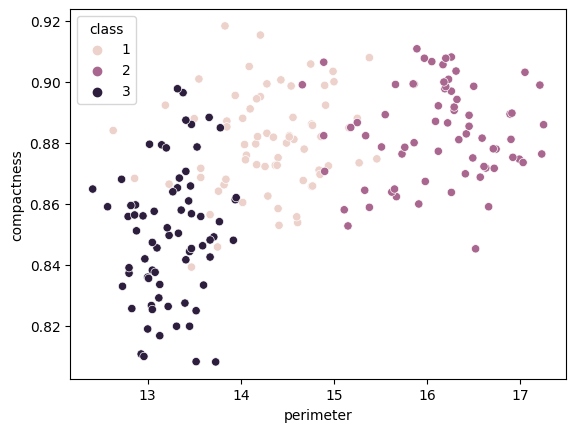

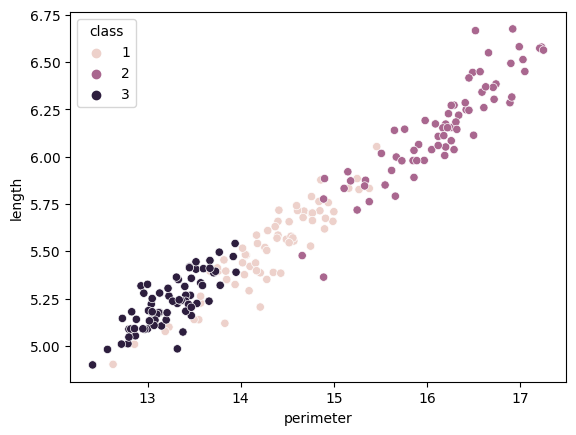

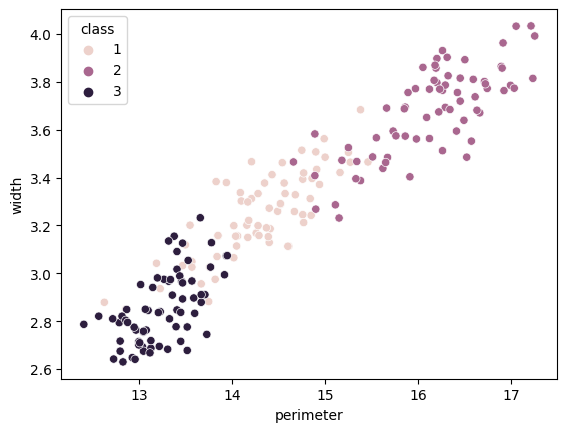

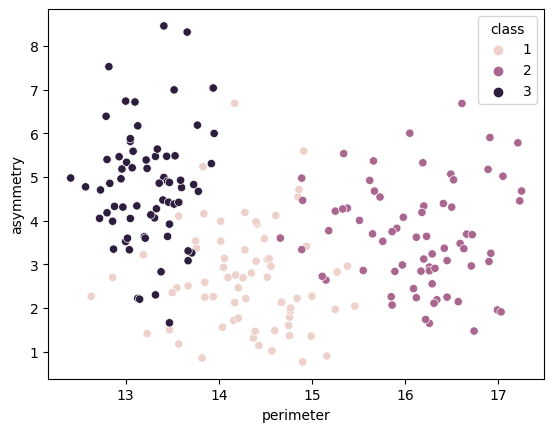

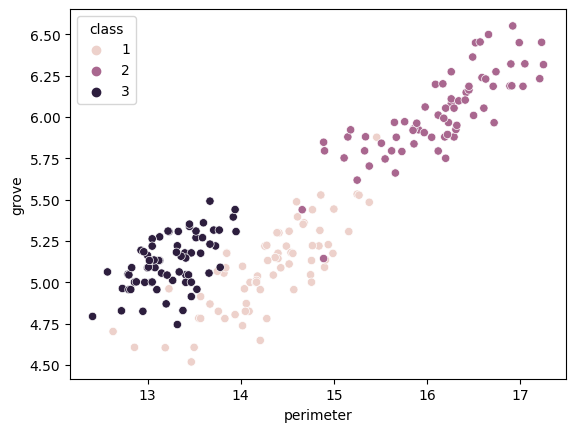

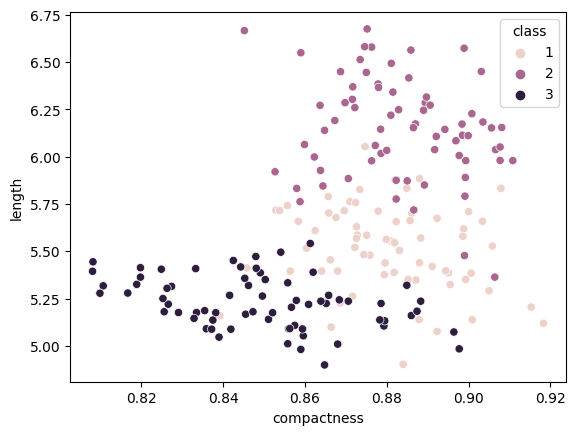

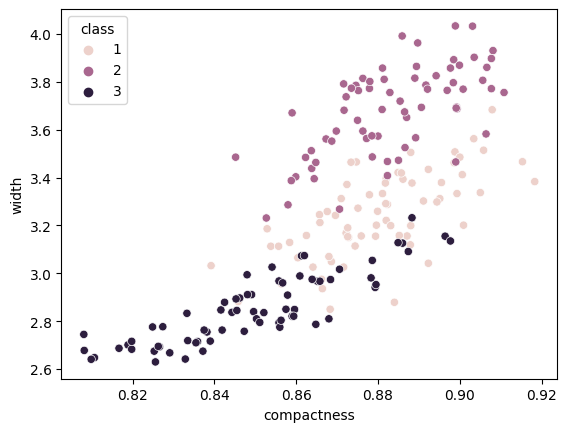

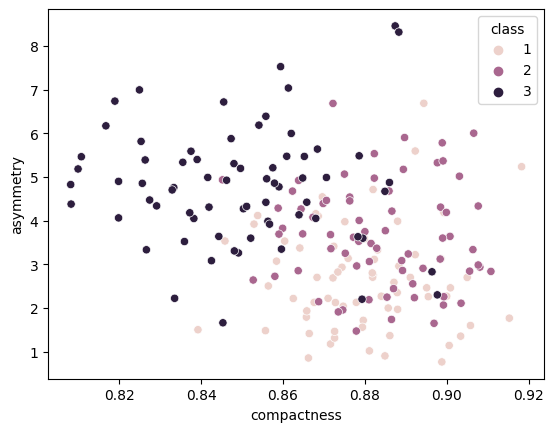

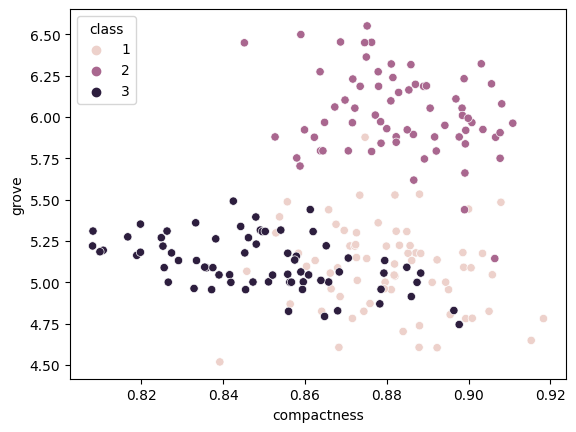

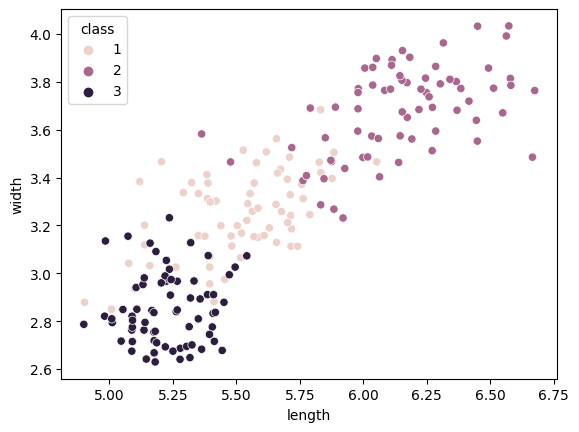

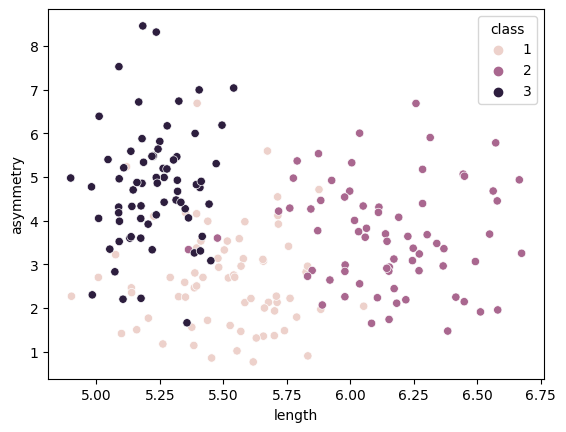

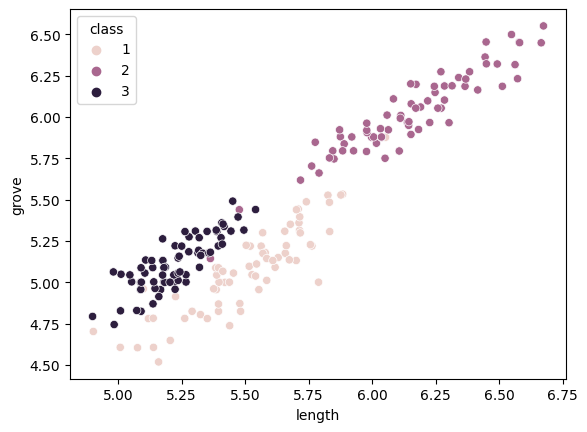

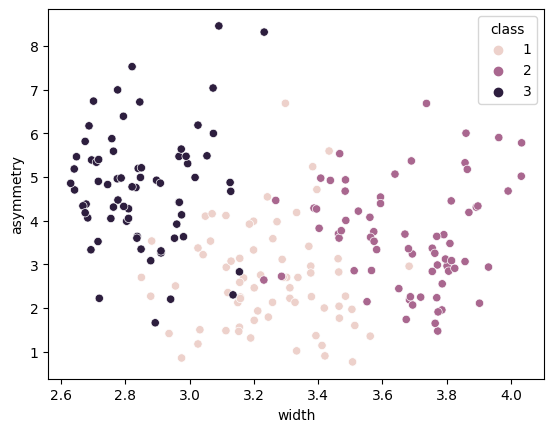

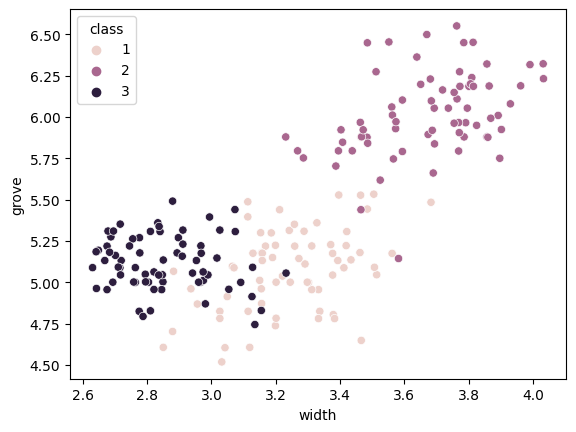

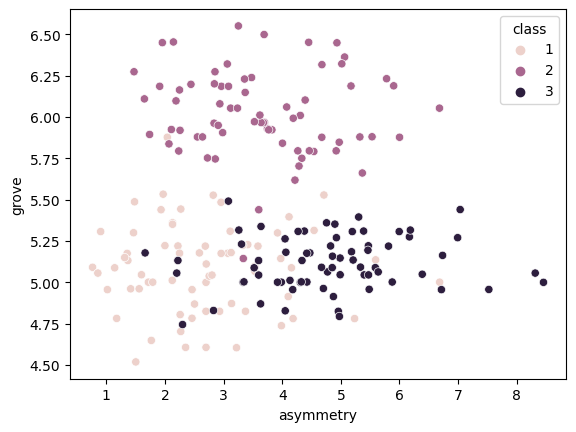

In [5]:
for i in range(len(cols)-1):
  for j in range(i+1, len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]
    sns.scatterplot(x=x_label, y=y_label, data =df , hue = "class")
    plt.show()

#clustering

In [6]:
from sklearn.cluster import KMeans

In [23]:
x = "compactness"
y = "asymmetry"
X = df[[x,y]].values

In [24]:
kmeans = KMeans(n_clusters = 3).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
clusters = kmeans.labels_

In [26]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns = [x,y, "class"])

[]

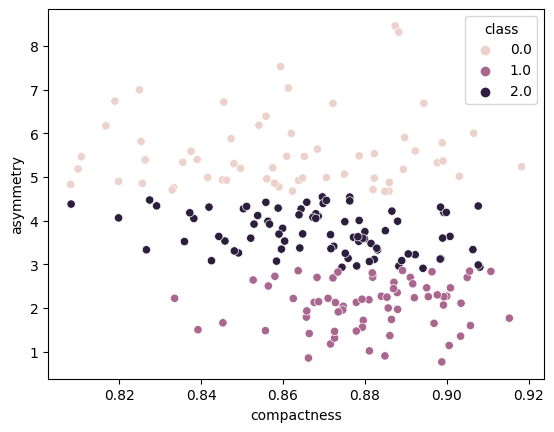

In [27]:
# k meayns classes
sns.scatterplot(x=x, y=y,hue = "class"  , data = cluster_df)
plt.plot()

[]

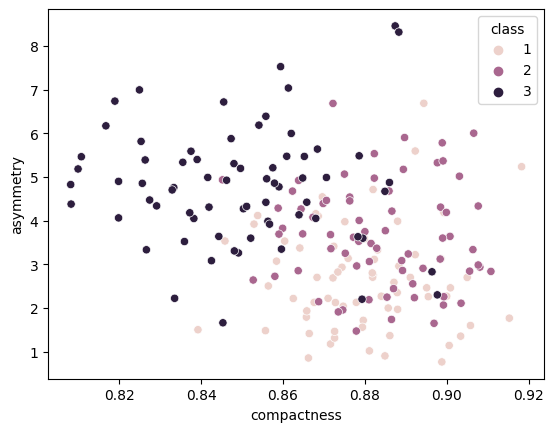

In [28]:
# original classes
sns.scatterplot(x=x, y=y,hue = "class"  , data = df)
plt.plot()

# Higher dimensions

In [29]:
X = df[cols[:-1]].values

In [33]:
kmeans = KMeans(n_clusters = 3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1,1))), columns = df.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[]

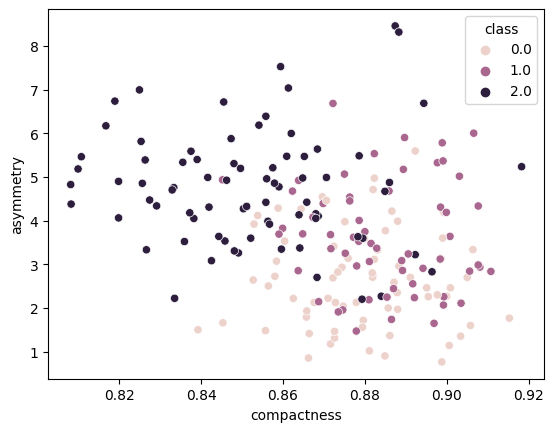

In [34]:
# k meayns classes
sns.scatterplot(x=x, y=y,hue = "class"  , data = cluster_df)
plt.plot()

[]

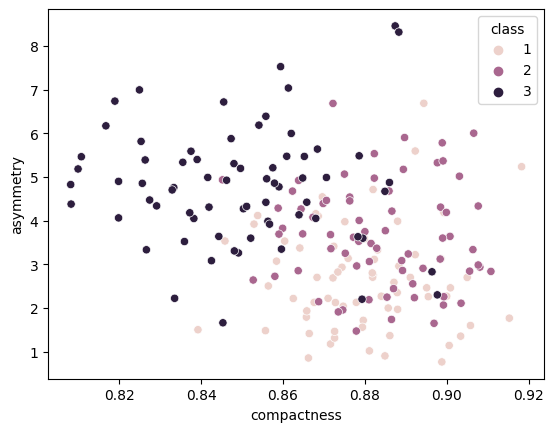

In [35]:
# original classes
sns.scatterplot(x=x, y=y,hue = "class"  , data = df)
plt.plot()

# PCA

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [39]:
X.shape

(210, 7)

In [40]:
transformed_x.shape

(210, 2)

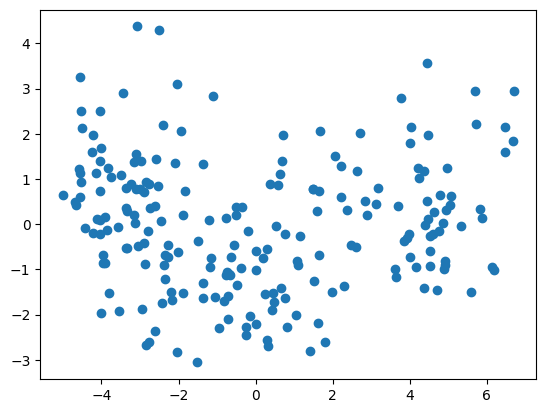

In [42]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [43]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1,1))), columns=["pca1", "pca2", "class"] )

In [45]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df["class"].values.reshape(-1,1))), columns=["pca1", "pca2", "class"] )

[]

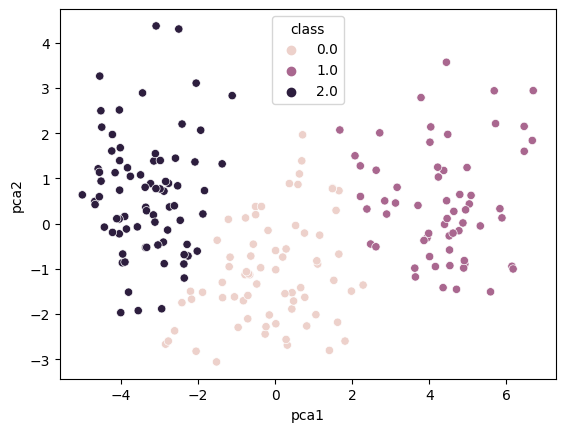

In [47]:
# k means pca classes
sns.scatterplot(x="pca1", y="pca2",hue = "class"  , data = kmeans_pca_df)
plt.plot()

[]

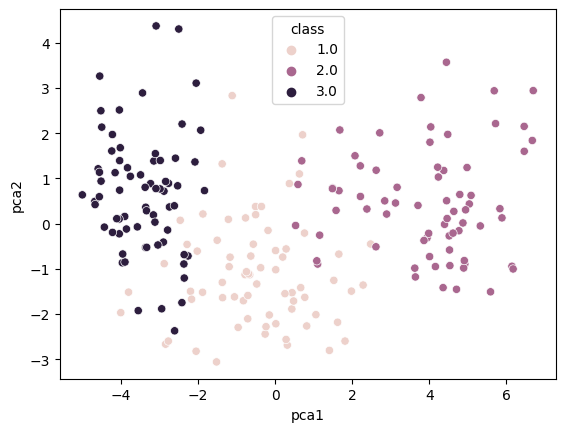

In [48]:
# truth classes
sns.scatterplot(x="pca1", y="pca2",hue = "class"  , data = truth_pca_df)
plt.plot()